In [4]:
#E1: I would use a clustering algorithm that would place customers with similarities into groups 
#E2: I would use a supervised learning model since we aren't trying to find new patterns. we can train this model with prior data so it can 
#    detect when spam is recieved.
#E3: A test set is a portion of the data the model has not seen, you would use a test set to test your trained model to evaluate performance.
#E4: E

In [1]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

s3 = boto3.resource('s3')
bucket_name = 'grant-gonnerman-data-445'
bucket = s3.Bucket(bucket_name)

file_key = 'Real_Estate.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# reading data file
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [2]:
##dropping No and transaction date
house_price = house_price.drop(columns = ['No', 'transaction_date'], axis = 1)
house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [41]:
# defining input and target variable
x = house_price.drop(columns = 'house_price_of_unit_area', axis = 1)
y = house_price['house_price_of_unit_area']

# spliting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# building the lm
lm_md = LinearRegression().fit(x_train, y_train)

In [42]:
lm_pred = lm_md.predict(x_test)
lm_pred

array([44.3713829 , 49.93951816, 42.40895078, 24.77398751, 34.48247126,
       34.75078044, 37.55586261, 45.22261861, 35.84417044, 42.74106686,
       32.68898432, 36.81354331, 43.10148245, 47.18852997, 45.08025649,
       48.01895405, 33.14228324, 35.60047327, 34.66780388, 39.89180743,
       45.75179429, 42.58321262, 44.45299587, 25.80297522, 40.54141866,
       41.8760278 , 38.811958  , 29.77048094, 41.91637521, 45.34453806,
       46.1510566 , 41.32182835, 43.24496009,  9.63364038, 37.50984996,
       34.10024064, 13.57904962, 45.13720134, 37.54776491, 39.36126377,
       29.83239842, 38.94685626, 38.37456797, 39.84827391, 30.443962  ,
       45.08025649, 15.14745549, 34.72706523, 43.43783613, 15.21973144,
       45.1823458 , 51.82092399, 33.51617833, 52.54211143, 40.3521672 ,
       33.08506237, 31.98054352, 40.44026454, 38.70234864, 33.28077726,
       48.01895405, 24.73039952, 43.2194986 , 37.6009438 , 33.0609761 ,
       14.91150194, 32.05065736, 45.76772834, 45.32470792, 28.17

In [43]:
# computing the mse
np.mean((y_test - lm_pred)**2)

97.0984401962492

In [44]:
# building the second lm
lm_md2 = LinearRegression().fit(x_train.drop(columns = 'distance_to_the_nearest_MRT_station', axis = 1), y_train)

lm_pred2 = lm_md2.predict(x_test.drop(columns = 'distance_to_the_nearest_MRT_station', axis = 1))
lm_pred2

array([44.67141785, 48.10645309, 36.48428094, 20.00323056, 33.19278923,
       34.44233136, 37.75079611, 42.54607512, 40.16898821, 42.97551994,
       30.32376727, 34.22628806, 39.90350289, 43.46177671, 42.39757376,
       48.94597269, 28.92714308, 33.46720633, 30.70073589, 38.75397024,
       46.18348571, 43.67895915, 45.27634562, 25.97701631, 34.86728147,
       42.06824789, 38.66530893, 33.18822428, 42.18326411, 45.80369373,
       47.98739137, 41.37296338, 44.0539513 , 17.54253089, 37.68237875,
       33.59622837, 16.52277095, 42.4569743 , 33.1666831 , 37.64981236,
       28.91579498, 41.09634517, 33.38326748, 39.06890107, 25.75745382,
       42.39757376, 18.13599475, 33.921587  , 42.33418311, 17.01350763,
       45.5894803 , 52.36122176, 32.1838189 , 54.1258593 , 41.15328822,
       34.49559073, 29.83452794, 34.66992449, 40.06135818, 31.62706279,
       48.94597269, 19.88113727, 40.01334766, 37.51891388, 30.69707777,
       16.69152156, 31.12976159, 46.44297656, 45.73798166, 25.66

In [45]:
# computing the mse
np.mean((y_test - lm_pred2)**2)

102.57533337852915

In [8]:
# from the results i would use the first model because the MSE is lower on the first model than the second. 

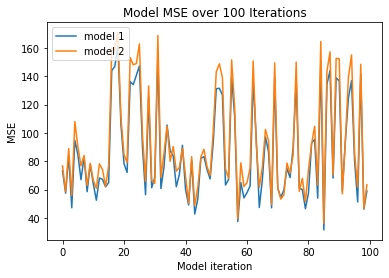

In [34]:
# building iteration loop
x = house_price.drop(columns = 'house_price_of_unit_area', axis = 1)
y = house_price['house_price_of_unit_area']

md1_results = list()
md2_results = list()

for i in range (0,100):
    # spliting the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    
    #building model 1
    lm_md = LinearRegression().fit(x_train, y_train)
    lm_pred = lm_md.predict(x_test)
    md1_results.append(np.mean((y_test - lm_pred)**2))
    
    #building model 2
    lm_md2 = LinearRegression().fit(x_train.drop(columns = 'distance_to_the_nearest_MRT_station', axis = 1), y_train)
    lm_pred2 = lm_md2.predict(x_test.drop(columns = 'distance_to_the_nearest_MRT_station', axis = 1))
    md2_results.append(np.mean((y_test - lm_pred2)**2))
    
index = np.linspace(0, 99, 100)

plt.plot(index, md1_results)
plt.plot(index, md2_results)
plt.legend(["model 1", "model 2"], loc = "upper left")
plt.title("Model MSE over 100 Iterations")
plt.xlabel("Model iteration")
plt.ylabel("MSE")
plt.show()

In [ ]:
# from the chart we can see the line for model 1 seems to be below model 2 meaning the mse for model 1 is lower than model 2 for a majority of the iterations.
# therefore model 1 performs better. 